In [22]:
# Importing pandas library
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re


### Data Collection

In [2]:
# Define the path to the data file
train_essay_path = '../data/raw/train_essays.csv'

# Load the data
train_essays = pd.read_csv(train_essay_path)

# Display the first few rows of the dataframe
train_essays.head()

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


In [8]:
# Get an overview of the dataset
print(train_essays.info())

# Statistical summary of numberical features
print(train_essays.describe())

# Check for missing values
print(train_essays.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB
None
         prompt_id    generated
count  1378.000000  1378.000000
mean      0.486212     0.002177
std       0.499991     0.046625
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     0.000000
75%       1.000000     0.000000
max       1.000000     1.000000
id           0
prompt_id    0
text         0
generated    0
dtype: int64


In [9]:
from IPython.display import display

display(train_essays.info())
display(train_essays.describe())
display(train_essays.isnull())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB


None

,prompt_id,generated
count,1378.000000,1378.000000
mean,0.486212,0.002177
std,0.499991,0.046625
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


,id,prompt_id,text,generated
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1373,False,False,False,False
1374,False,False,False,False
1375,False,False,False,False
1376,False,False,False,False


### Exploratory Data Analysis (EDA)

* **Objective**: Understand the data and its characteristics.
* **Actions**:
    * Examining the data's structure, content, and statistics
    * Identifying patterns, anomalies, and relationships in the data.
* **Outcome**: Insights that inform further data processing and feature engineering.

In [17]:
# Display the column names of the train_essays DataFrame
print(train_essays.columns)

Index(['id', 'prompt_id', 'text', 'generated'], dtype='object')


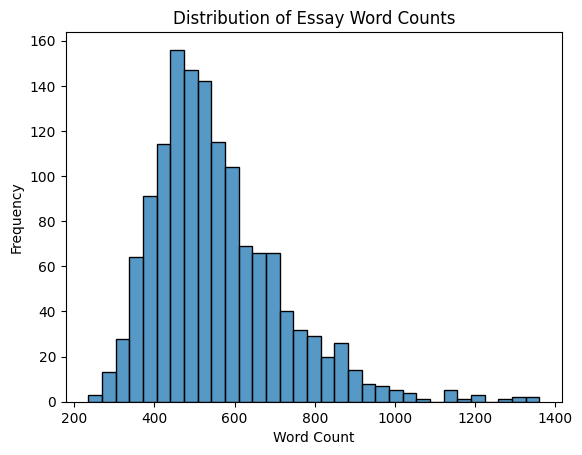

In [19]:
# Calculate word count for each essay 
# text column contains the essay text 
train_essays['word_count'] = train_essays['text'].apply(lambda x: len(x.split()))

# Plot the distribution of word counts
# This helps to understand the length of essays.
sns.histplot(train_essays['word_count'])
plt.title('Distribution of Essay Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


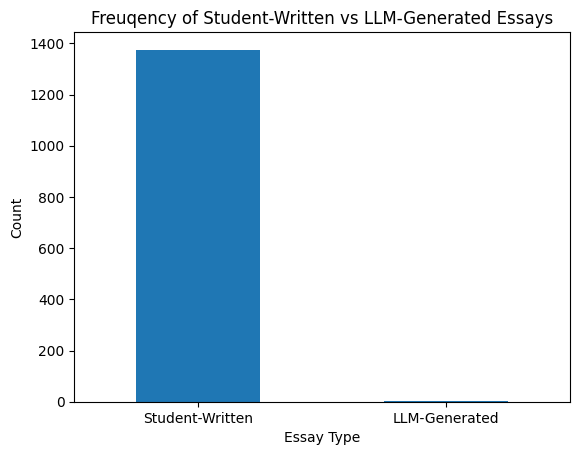

In [20]:
# Plotting the frequency of each category in the 'generated' column
# This column indicates whether the essay is studen-written (0) or LLM-generated(1)

train_essays['generated'].value_counts().plot(kind='bar')
plt.title('Freuqency of Student-Written vs LLM-Generated Essays')
plt.xlabel('Essay Type')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Student-Written', 'LLM-Generated'], rotation=0)
plt.show()

### Data Preprocessing

* **Objective**: Prepare the data for modeling.
* **Actions**:
    * Cleaning the data.
    * Handling missing values.
    * Feature extraction and transformation. Technique: TF-IDF Vectorization
       * Why TF-IDF?
         * **Suitability for Text Classification**: TF-IDF diminishes the weight of terms that occur very frequently in the dataset and increases the weight of terms that occur rarely, which can be more informative.
         * **Effectiveness in Handling Overrepresented Words**:  It helps in dealing with the most common words in the dataset, ensuring that they don’t overshadow the rarer but potentially more relevant words.
       * Alternatives:
         * **Bag-of-Words** (BoW): Counts word occurrences.
             * Why Not First Choice: BoW gives equal weight to all words, which can be less effective if frequency doesn’t imply importance.
         * **Word Embeddings(Word2Vec, GloVe): Captures semantic relationships between words.
             * Why Not First Choice: They require a larger dataset to be effective and are more complex to implement. They’re excellent for capturing the context but might be overkill for simpler classification tasks.
      
* **Outcome**: Cleaned and transformed data ready for feature engineering and modeling.

In [23]:

# Text Cleaning (Lowercasing and Removal of special Character and Punctuations)

def clean_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'[^\w\s]', ' ', text) # removal punctuation and special char
    return text

train_essays['cleaned_text'] = train_essays['text'].apply(clean_text)

In [24]:
# Handling Missing Values

missing_values = train_essays.isnull().sum()
missing_values

id              0
prompt_id       0
text            0
generated       0
word_count      0
cleaned_text    0
dtype: int64

In [25]:
# Feature Extraction from Text - Transform text data into a numerical format that machine learning algorithms can process. 
# TF-IDF Vectorisation - Convert text into a matrrix of TF-IDF features. Alternate to this could be bag-of-words and Word Embedding (Word2vec, GloVe)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000) # Limit number of features for simplicity
tfidf_matrix = tfidf_vectorizer.fit_transform(train_essays['cleaned_text'])

